<a href="https://colab.research.google.com/github/felicitymueni/SARS-CoV-2-Systematic-review-Data-Analysis/blob/main/Systematic_review_Data_Fetching_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install biopython


In [14]:
from Bio import Entrez
import pandas as pd

# Set your email here (required by NCBI)
Entrez.email = "felicitymueni99@gmail.com"

# Function to search PubMed for disease-related papers with ML algorithms
def get_count(disease_terms, ml_algorithms):
    df = pd.DataFrame(columns=["ML_algorithm", "Count", "First_Paper", "Latest_Paper"])

    for ml_algorithm in ml_algorithms:
        # Build the query term
        query = f"({' OR '.join(disease_terms)}) AND {ml_algorithm}"

        # Search PubMed for the query
        handle = Entrez.esearch(db="pubmed", retmax=1000000, term=query)
        records = Entrez.read(handle)
        pubmed_ids = records["IdList"]

        if len(pubmed_ids) > 0:
            # Fetch the first and latest papers for the ML algorithm
            handle_1 = Entrez.esummary(db="pubmed", id=pubmed_ids[0])
            handle_2 = Entrez.esummary(db="pubmed", id=pubmed_ids[-1])

            record_1 = Entrez.read(handle_1)
            record_2 = Entrez.read(handle_2)

            # Add the machine learning algorithm, number of papers, first, and latest paper dates to the DataFrame
            df.loc[len(df)] = [
                ml_algorithm.replace('"', ''),
                len(pubmed_ids),
                record_1[0]["PubDate"],
                record_2[0]["PubDate"]
            ]
        else:
            df.loc[len(df)] = [ml_algorithm.replace('"', ''), 0, "N/A", "N/A"]

    return df

# Lists of technical terms and machine learning algorithms
other_tech = ['"Cycle threshold values"', '"PCR"', '"SARS-Cov-2"', '"Viral dynamics"', '"COVID-19"', '"asymptomatic"', '"Time since symptom onset"', '"Symptomatic"', '"Viral load"']
ml_algorithms = ['"machine learning"', '"neural networks"', '"support vector machine"', '"k-nearest neighbor"', '"linear regression"', '"random forests"', '"logistic regression"', '"Linear mixed effects"', '"bayesian networks"', '"data science"']

# Get counts of papers related to SARS-CoV-2 dynamics and ML algorithms
df_results = get_count(other_tech, ml_algorithms)

# Save the results to a CSV file
df_results.to_csv('sars_cov2_ml_papers_2021_2024.csv', index=False)
print("Results saved to 'sars_cov2_ml_papers_2021_2024.csv'")

# Display the DataFrame
df_results


Results saved to 'sars_cov2_ml_papers_2021_2024.csv'


,ML_algorithm,Count,First_Paper,Latest_Paper
0,machine learning,7852,2024 Dec,1995
1,neural networks,2315,2024 Oct 10,1993
2,support vector machine,1148,2024,2002 Jun 1
3,k-nearest neighbor,186,2024 Sep,2002
4,linear regression,9004,2024 Oct 10,1975 Feb
5,random forests,137,2024 Oct 1,2007 Oct 29
6,logistic regression,9999,2024 Oct 10,2022
7,Linear mixed effects,776,2024 Oct 10,2001 Apr 13
8,bayesian networks,46,2024 Aug 2,2003 Aug
9,data science,4511,2024 Oct 10,2013 May


In [3]:
other_tech_Sars_cov2 = get_count("Sars-cov2",other_tech)
other_tech_Sars_cov2

,ML_algorithm,Count,First_Paper,Latest_Paper
0,Cycle threshold values,380,2024 Sep,2000 Mar
1,PCR,9999,2024 Oct 10,2024 Feb 1
2,SARS-Cov-2,9999,2024 Oct 10,2023 Dec 26
3,Viral dynamics,732,2024 Oct,1995 Jan 12
4,COVID-19,9999,2024 Oct 10,2024 Jul
5,asymptomatic,9999,2024 Sep,2023 Apr
6,Time since symptom onset,9999,2024,2020
7,Symptomatic,9999,2024 Oct 10,2022 Dec
8,Viral load,9999,2024 Oct 8,2019 Nov


In [12]:
from Bio import Entrez
import pandas as pd

# Set your email here (required by NCBI)
Entrez.email = "felicitymueni99@gmail.com"

# Function to search PubMed based on region and terms
def search_pubmed(query, region, max_results=1000000):
    search_term = f"({query}) AND {region}[Location]"
    handle = Entrez.esearch(db="pubmed", term=search_term, retmax=max_results)
    records = Entrez.read(handle)
    return records['IdList']  # List of PubMed IDs

# Function to fetch article details by their PubMed IDs
def fetch_article_details(pubmed_ids):
    if not pubmed_ids:
        return []

    ids = ",".join(pubmed_ids)
    handle = Entrez.efetch(db="pubmed", id=ids, retmode="xml")
    records = Entrez.read(handle)

    articles = []
    for article in records['PubmedArticle']:
        citation = article['MedlineCitation']
        article_info = citation['Article']
        journal_title = article_info['Journal']['Title']
        title = article_info['ArticleTitle']
        pub_date = article_info['Journal']['JournalIssue']['PubDate'].get('Year', 'Unknown')
        country = citation['MedlineJournalInfo'].get('Country', 'Unknown')
        pmid = citation['PMID']
        abstract = article_info.get('Abstract', {}).get('AbstractText', ['No abstract available'])[0]

        articles.append({
            "PMID": pmid,
            "Title": title,
            "Journal": journal_title,
            "PubDate": pub_date,
            "Country": country,
            "Abstract": abstract
        })
    return articles

# Function to group results by country
def group_by_country(articles):
    df = pd.DataFrame(articles)
    grouped = df.groupby('Country').size().reset_index(name='Count')
    return grouped

# Lists of technical terms to search for
other_tech = ['"Cycle threshold values"', '"PCR"', '"SARS-Cov-2"', '"Viral dynamics"', '"COVID-19"', '"asymptomatic"', '"Time since symptom onset"', '"Symptomatic"', '"Viral load"']
query = " OR ".join(other_tech)

# Search regions: Kenya, Africa, and Global
kenya = "Kenya"
africa = "Africa"
global_region = "global"

# Fetch PubMed articles for each region
kenya_ids = search_pubmed(query, kenya)
africa_ids = search_pubmed(query, africa)
global_ids = search_pubmed(query, global_region)

# Fetch details for Kenya, Africa, and Global
kenya_articles = fetch_article_details(kenya_ids)
africa_articles = fetch_article_details(africa_ids)
global_articles = fetch_article_details(global_ids)

# Group Africa articles by country
africa_grouped = group_by_country(africa_articles)

# Group Global articles by country (excluding Africa)
global_grouped = group_by_country(global_articles)

# Save results to CSV files for further review
kenya_df = pd.DataFrame(kenya_articles)
africa_df = pd.DataFrame(africa_articles)
global_df = pd.DataFrame(global_articles)

kenya_df.to_csv('kenya_sars_cov2_papers_2021_2024.csv', index=False)
africa_df.to_csv('africa_sars_cov2_papers_2021_2024.csv', index=False)
global_df.to_csv('global_sars_cov2_papers_2021_2024.csv', index=False)

# Save grouped results
africa_grouped.to_csv('africa_grouped_by_country_sars_cov2_papers.csv', index=False)
global_grouped.to_csv('global_grouped_by_country_sars_cov2_papers.csv', index=False)

print("Results saved. Files: 'kenya_sars_cov2_papers_2021_2024.csv', 'africa_sars_cov2_papers_2021_2024.csv', 'global_sars_cov2_papers_2021_2024.csv'")
print("Grouped files: 'africa_grouped_by_country_sars_cov2_papers.csv', 'global_grouped_by_country_sars_cov2_papers.csv'")


Results saved. Files: 'kenya_sars_cov2_papers_2021_2024.csv', 'africa_sars_cov2_papers_2021_2024.csv', 'global_sars_cov2_papers_2021_2024.csv'
Grouped files: 'africa_grouped_by_country_sars_cov2_papers.csv', 'global_grouped_by_country_sars_cov2_papers.csv'


In [15]:
from Bio import Entrez

# Set your email here (required by NCBI)
Entrez.email = "felicitymueni99@gmail.com"

# Function to search PubMed and return count of articles
def count_pubmed_papers(query, region):
    search_term = f"({query}) AND {region}[Location]"
    handle = Entrez.esearch(db="pubmed", term=search_term, retmax=1000000)
    records = Entrez.read(handle)
    return len(records['IdList'])  # Return the number of PubMed IDs (i.e., the count of papers)

# Lists of technical terms to focus on SARS-CoV-2 dynamics, Ct values, and viral load
sars_cov2_query = '"SARS-CoV-2" AND ("Cycle threshold values" OR "Ct values") AND "RT-PCR" AND ("Viral load" OR "Viral dynamics")'

# Define regions for the search
kenya = "Kenya"
africa = "Africa"
global_region = "global"

# Count the number of papers for Kenya, Africa, and Global
kenya_count = count_pubmed_papers(sars_cov2_query, kenya)
africa_count = count_pubmed_papers(sars_cov2_query, africa)
global_count = count_pubmed_papers(sars_cov2_query, global_region)

# Print the results
print(f"Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in Kenya: {kenya_count}")
print(f"Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in Africa: {africa_count}")
print(f"Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR globally: {global_count}")


Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in Kenya: 0
Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in Africa: 5
Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR globally: 21


In [7]:
from Bio import Entrez

# Set your email here (required by NCBI)
Entrez.email = "felicitymueni99@gmail.com"

# Function to search PubMed and return count and countries
def count_pubmed_papers(query, location):
    search_term = f"({query}) AND {location}[Location]"
    handle = Entrez.esearch(db="pubmed", term=search_term, retmax=1000000)
    records = Entrez.read(handle)
    return len(records['IdList'])  # Return the number of PubMed IDs (i.e., the count of papers)

# Function to get paper counts for multiple locations
def get_paper_counts(query, locations):
    counts = {}
    for location in locations:
        count = count_pubmed_papers(query, location)
        counts[location] = count
    return counts

# Lists of technical terms to focus on SARS-CoV-2 dynamics, Ct values, and viral load
sars_cov2_query = '"SARS-CoV-2" AND ("Cycle threshold values" OR "Ct values") AND "RT-PCR" AND ("Viral load" OR "Viral dynamics")'

# Define regions for the search
african_countries = [
    "Nigeria", "Ethiopia", "Egypt", "South Africa", "Tanzania",
    "Kenya", "Uganda", "Ghana", "Algeria", "Morocco",
    "Angola", "Mozambique", "Madagascar", "Cameroon", "Ivory Coast",
    "Niger", "Burkina Faso", "Mali", "Zambia", "Senegal"
]

# Add a global search term (this could be "global" or simply leave it empty for all)
global_search_term = ""

# Count the number of papers for specific African countries and globally
africa_counts = get_paper_counts(sars_cov2_query, african_countries)
global_count = count_pubmed_papers(sars_cov2_query, global_search_term)

# Print the results for African countries
print("Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in African countries:")
for country, count in africa_counts.items():
    print(f"{country}: {count}")

# Print global count
print(f"\nNumber of papers estimating SARS-CoV-2 dynamics globally: {global_count}")

Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in African countries:
Nigeria: 1
Ethiopia: 1
Egypt: 1
South Africa: 3
Tanzania: 0
Kenya: 0
Uganda: 2
Ghana: 2
Algeria: 0
Morocco: 1
Angola: 0
Mozambique: 0
Madagascar: 1
Cameroon: 0
Ivory Coast: 0
Niger: 0
Burkina Faso: 0
Mali: 0
Zambia: 0
Senegal: 1

Number of papers estimating SARS-CoV-2 dynamics globally: 3


In [8]:
from Bio import Entrez

# Set your email here (required by NCBI)
Entrez.email = "felicitymueni99@gmail.com"

# Function to search PubMed and return count of articles
def count_pubmed_papers(query, location):
    search_term = f"({query}) AND {location}[Location]"
    handle = Entrez.esearch(db="pubmed", term=search_term, retmax=1000000)
    records = Entrez.read(handle)
    return len(records['IdList'])  # Return the number of PubMed IDs (i.e., the count of papers)

# Function to get paper counts for multiple locations
def get_paper_counts(query, locations):
    counts = {}
    for location in locations:
        count = count_pubmed_papers(query, location)
        counts[location] = count
    return counts

# Lists of technical terms to focus on SARS-CoV-2 dynamics, Ct values, and viral load
sars_cov2_query = '"SARS-CoV-2" AND ("Cycle threshold values" OR "Ct values") AND "RT-PCR" AND ("Viral load" OR "Viral dynamics")'

# Define regions for the search
african_countries = [
    "Nigeria", "Ethiopia", "Egypt", "South Africa", "Tanzania",
    "Kenya", "Uganda", "Ghana", "Algeria", "Morocco",
    "Angola", "Mozambique", "Madagascar", "Cameroon", "Ivory Coast",
    "Niger", "Burkina Faso", "Mali", "Zambia", "Senegal"
]

# Define a list of countries outside Africa
non_african_countries = [
    "USA", "Canada", "United Kingdom", "Germany", "France",
    "Italy", "Spain", "Australia", "India", "Japan",
    "Brazil", "Argentina", "Mexico", "Russia", "China",
    "South Korea", "Turkey", "Saudi Arabia", "United Arab Emirates"
]

# Count the number of papers for specific African countries and non-African countries
africa_counts = get_paper_counts(sars_cov2_query, african_countries)
non_africa_counts = get_paper_counts(sars_cov2_query, non_african_countries)

# Print the results for African countries
print("Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in African countries:")
for country, count in africa_counts.items():
    print(f"{country}: {count}")

# Print the results for non-African countries
print("\nNumber of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in non-African countries:")
for country, count in non_africa_counts.items():
    print(f"{country}: {count}")

Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in African countries:
Nigeria: 1
Ethiopia: 1
Egypt: 1
South Africa: 3
Tanzania: 0
Kenya: 0
Uganda: 2
Ghana: 2
Algeria: 0
Morocco: 1
Angola: 0
Mozambique: 0
Madagascar: 1
Cameroon: 0
Ivory Coast: 0
Niger: 0
Burkina Faso: 0
Mali: 0
Zambia: 0
Senegal: 1

Number of papers estimating SARS-CoV-2 dynamics using viral load distributions and Ct values from RT-PCR in non-African countries:
USA: 27
Canada: 5
United Kingdom: 11
Germany: 11
France: 8
Italy: 24
Spain: 8
Australia: 1
India: 19
Japan: 6
Brazil: 9
Argentina: 3
Mexico: 0
Russia: 0
China: 20
South Korea: 8
Turkey: 9
Saudi Arabia: 3
United Arab Emirates: 1


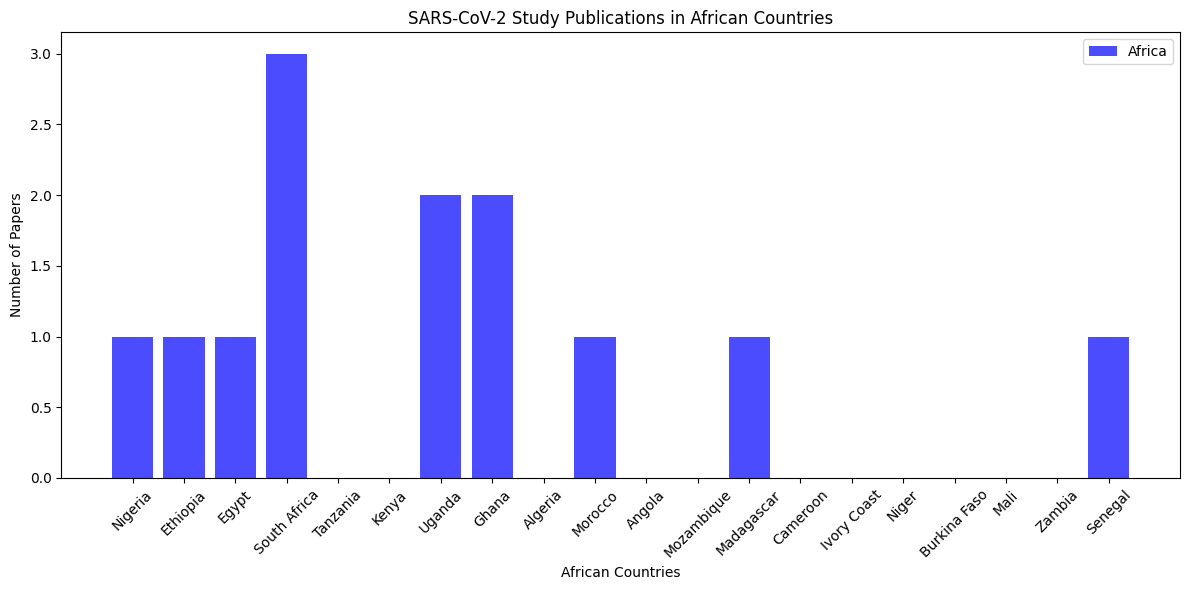

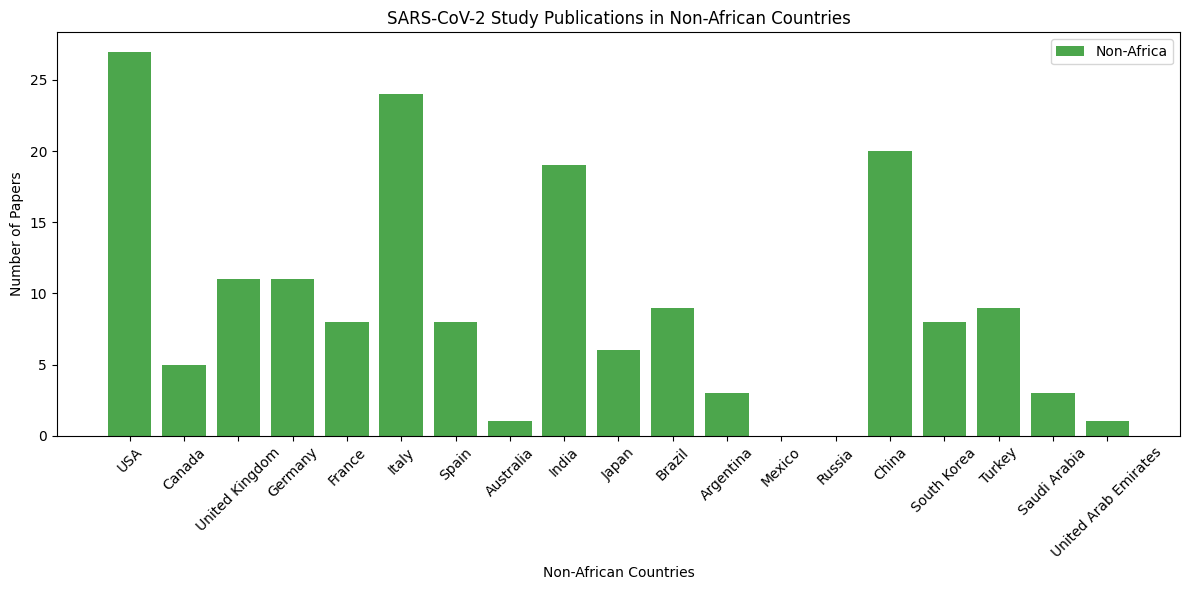

In [9]:
import matplotlib.pyplot as plt
# Prepare data for bar chart
africa_countries = list(africa_counts.keys())
africa_counts_values = list(africa_counts.values())

non_africa_countries = list(non_africa_counts.keys())
non_africa_counts_values = list(non_africa_counts.values())

# Create a bar chart for African countries
plt.figure(figsize=(12, 6))
plt.bar(africa_countries, africa_counts_values, color='blue', alpha=0.7, label='Africa')
plt.xlabel('African Countries')
plt.ylabel('Number of Papers')
plt.title('SARS-CoV-2 Study Publications in African Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create a bar chart for Non-African countries
plt.figure(figsize=(12, 6))
plt.bar(non_africa_countries, non_africa_counts_values, color='green', alpha=0.7, label='Non-Africa')
plt.xlabel('Non-African Countries')
plt.ylabel('Number of Papers')
plt.title('SARS-CoV-2 Study Publications in Non-African Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
import plotly.express as px
import pandas as pd

# Prepare data for geographical representation: combining the counts into a DataFrame
africa_data = pd.DataFrame.from_dict(africa_counts, orient='index', columns=['Count']).reset_index()
africa_data.columns = ['Country', 'Count']

non_africa_data = pd.DataFrame.from_dict(non_africa_counts, orient='index', columns=['Count']).reset_index()
non_africa_data.columns = ['Country', 'Count']

# Combine both into one DataFrame
combined_data = pd.concat([africa_data, non_africa_data], ignore_index=True)

# Create a world map using plotly
fig = px.choropleth(combined_data,
                    locations="Country",
                    locationmode='country names',  # Identify by country names
                    color="Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="SARS-CoV-2 Study Publications by Country")

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_layout(title_text="SARS-CoV-2 Study Publications by Country",
                  geo=dict(
                      showframe=False,
                      projection_type='natural earth'
                  ))
fig.show()